In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
import numpy as np

In [2]:
# protein coding genes
ensgid = pd.read_csv('/home/jiageng/Documents/fhr/annotations/ensgid-autosomal-proteincoding.txt', sep='\t', skiprows=1, names=['gid','gname','Chromosome','Start','End'])

In [4]:
# miRNA
ensgid = pd.read_csv('/home/jiageng/Documents/fhr/annotations/ensgid-autosomal-mirna.txt', sep='\t', skiprows=1, names=['gid','Chromosome','Start','End','gname'])

In [43]:
# lncRNA
ensgid = pd.read_csv('/home/jiageng/Documents/fhr/annotations/ensgid-autosomal-lncrna.txt', sep='\t', skiprows=1, names=['gid','Chromosome','Start','End','gname'])

In [3]:
ensgid_index = ensgid.set_index(['gid','gname']).index

In [8]:
dfexp = pd.read_csv('/home/jiageng/Documents/fhr/data/Expression Estimates - Gene Based_MMRF_CoMMpass_IA22_salmon_geneUnstrandedIgFiltered_tpm.tsv.gz',sep='\t')


In [9]:
samples = dfexp.columns[1:]

In [10]:
public_id = dfexp.columns.str.extract(r'(MMRF_\d{4})')[1:]

In [11]:
first_samples = pd.DataFrame(zip(public_id.values[:,0],samples.values),columns=['PUBLIC_ID','SAMPLE']).groupby(['PUBLIC_ID']).head(1)
first_samples

,PUBLIC_ID,SAMPLE
0,MMRF_1021,MMRF_1021_1_BM_CD138pos
1,MMRF_1024,MMRF_1024_1_BM_CD138pos
4,MMRF_1029,MMRF_1029_1_BM_CD138pos
5,MMRF_1030,MMRF_1030_1_BM_CD138pos
9,MMRF_1031,MMRF_1031_1_BM_CD138pos
...,...,...
928,MMRF_2939,MMRF_2939_1_BM_CD138pos
929,MMRF_2940,MMRF_2940_1_BM_CD138pos
930,MMRF_2941,MMRF_2941_1_BM_CD138pos
931,MMRF_2946,MMRF_2946_1_BM_CD138pos


Subset to protein coding genes & first samples

In [9]:
dfexp.head()

,Gene,MMRF_1021_1_BM_CD138pos,MMRF_1024_1_BM_CD138pos,MMRF_1024_3_BM_CD138pos,MMRF_1024_2_BM_CD138pos,MMRF_1029_1_BM_CD138pos,MMRF_1030_1_BM_CD138pos,MMRF_1030_3_BM_CD138pos,MMRF_1030_4_BM_CD138pos,MMRF_1030_5_BM_CD138pos,MMRF_1031_1_BM_CD138pos,MMRF_1032_1_BM_CD138pos,MMRF_1033_1_BM_CD138pos,MMRF_1037_1_BM_CD138pos,MMRF_1038_1_BM_CD138pos,MMRF_1048_1_BM_CD138pos,MMRF_1049_2_BM_CD138pos,MMRF_1049_4_BM_CD138pos,MMRF_1056_6_BM_CD138pos,MMRF_1061_3_BM_CD138pos,MMRF_1068_1_BM_CD138pos,MMRF_1072_2_BM_CD138pos,MMRF_1073_1_BM_CD138pos,MMRF_1077_1_BM_CD138pos,MMRF_1079_1_BM_CD138pos,...,MMRF_2830_1_BM_CD138pos,MMRF_2831_1_BM_CD138pos,MMRF_2832_1_BM_CD138pos,MMRF_2834_1_BM_CD138pos,MMRF_2836_1_BM_CD138pos,MMRF_2843_1_BM_CD138pos,MMRF_2847_1_BM_CD138pos,MMRF_2848_1_BM_CD138pos,MMRF_2851_1_BM_CD138pos,MMRF_2853_1_BM_CD138pos,MMRF_2903_1_BM_CD138pos,MMRF_2905_1_BM_CD138pos,MMRF_2908_1_BM_CD138pos,MMRF_2914_1_BM_CD138pos,MMRF_2921_1_BM_CD138pos,MMRF_2921_2_BM_CD138pos,MMRF_2924_1_BM_CD138pos,MMRF_2926_1_BM_CD138pos,MMRF_2936_1_PB_CD138pos,MMRF_2938_1_BM_CD138pos,MMRF_2939_1_BM_CD138pos,MMRF_2940_1_BM_CD138pos,MMRF_2941_1_BM_CD138pos,MMRF_2946_1_BM_CD138pos,MMRF_2947_1_BM_CD138pos
0,ENSG00000000003,24.06020,9.26375,9.05981,8.96080,16.97330,0.969095,0.12039,0.886352,0.178138,0.035827,0.886566,0.308465,0.300618,3.60547,0.696653,0.536551,0.149197,0.00000,5.73625,0.00000,6.711740,1.82973,0.00000,37.7367,...,0.026991,2.317360,0.026157,1.976530,0.082349,0.007130,0.924425,1.20741,0.160392,0.064672,0.930063,4.35205,0.020671,5.32498,1.02019,1.67013,0.958704,0.26882,1.16341,11.19540,0.047418,0.521136,0.004138,8.33004,0.06917
1,ENSG00000000005,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.123776,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.029742,0.00000,0.00000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.01170,0.000000,0.00000,0.00000,0.00000,0.000000,0.026069,0.000000,0.00000,0.00000
2,ENSG00000000419,64.03230,29.61760,32.86070,31.75310,55.99980,49.706400,67.76900,55.553600,107.119000,63.852600,54.427500,41.739900,42.137200,45.26950,52.101100,41.489700,39.511600,22.81380,63.11290,52.07500,49.773000,36.81930,34.97860,42.7704,...,63.898800,85.308600,53.306800,110.703000,103.533000,52.465600,49.399300,47.30290,86.223300,32.579500,44.151300,45.41710,68.523000,63.33530,62.63770,65.57670,49.050100,42.31390,92.23890,53.12470,77.719700,47.628200,74.162400,45.30920,39.79090
3,ENSG00000000457,10.88410,5.98851,11.74290,11.05970,10.07510,6.215370,10.54790,9.580530,8.006200,7.548400,4.994330,8.541440,5.795510,5.30958,5.039870,4.408630,7.294610,8.32356,4.49110,7.08944,9.098470,5.84183,9.78189,14.4378,...,3.033810,1.822210,3.138610,1.977210,1.853590,1.830760,3.053530,5.17523,4.952210,7.543360,6.585270,7.28089,13.476900,10.51580,8.83138,6.90505,4.107660,4.20888,8.48890,7.06580,14.426500,1.829760,2.200490,6.35487,7.30977
4,ENSG00000000460,7.18014,1.25799,3.86253,3.23004,3.50257,1.463370,8.42612,11.433800,8.089420,6.333290,2.864740,1.372150,2.174200,1.40812,3.819070,1.359100,2.697690,24.57920,2.60187,1.60197,3.663730,1.29681,2.03458,11.1350,...,0.528645,0.429433,0.548527,0.445058,1.008050,0.751723,0.420337,1.13987,1.102670,0.440124,2.229720,3.65028,11.578500,7.13765,3.67732,3.43907,3.164980,1.34231,6.12988,3.85026,16.561000,0.990250,1.076120,5.90676,2.77125


In [10]:
'Gene|' + '|'.join(first_samples.SAMPLE)

'Gene|MMRF_1021_1_BM_CD138pos|MMRF_1024_1_BM_CD138pos|MMRF_1029_1_BM_CD138pos|MMRF_1030_1_BM_CD138pos|MMRF_1031_1_BM_CD138pos|MMRF_1032_1_BM_CD138pos|MMRF_1033_1_BM_CD138pos|MMRF_1037_1_BM_CD138pos|MMRF_1038_1_BM_CD138pos|MMRF_1048_1_BM_CD138pos|MMRF_1049_2_BM_CD138pos|MMRF_1056_6_BM_CD138pos|MMRF_1061_3_BM_CD138pos|MMRF_1068_1_BM_CD138pos|MMRF_1072_2_BM_CD138pos|MMRF_1073_1_BM_CD138pos|MMRF_1077_1_BM_CD138pos|MMRF_1079_1_BM_CD138pos|MMRF_1080_1_BM_CD138pos|MMRF_1082_1_BM_CD138pos|MMRF_1085_3_BM_CD138pos|MMRF_1089_1_BM_CD138pos|MMRF_1092_1_BM_CD138pos|MMRF_1098_1_BM_CD138pos|MMRF_1099_1_BM_CD138pos|MMRF_1100_1_BM_CD138pos|MMRF_1101_2_BM_CD138pos|MMRF_1107_1_BM_CD138pos|MMRF_1108_1_BM_CD138pos|MMRF_1110_2_BM_CD138pos|MMRF_1112_3_BM_CD138pos|MMRF_1128_1_BM_CD138pos|MMRF_1129_1_BM_CD138pos|MMRF_1130_1_BM_CD138pos|MMRF_1131_2_BM_CD138pos|MMRF_1137_4_BM_CD138pos|MMRF_1148_1_BM_CD138pos|MMRF_1151_1_BM_CD138pos|MMRF_1152_1_BM_CD138pos|MMRF_1153_1_BM_CD138pos|MMRF_1157_2_BM_CD138pos|MMRF_1159_

In [11]:
dfexp.filter(regex = 'Gene|' + '|'.join(first_samples.SAMPLE))

,Gene,MMRF_1021_1_BM_CD138pos,MMRF_1024_1_BM_CD138pos,MMRF_1029_1_BM_CD138pos,MMRF_1030_1_BM_CD138pos,MMRF_1031_1_BM_CD138pos,MMRF_1032_1_BM_CD138pos,MMRF_1033_1_BM_CD138pos,MMRF_1037_1_BM_CD138pos,MMRF_1038_1_BM_CD138pos,MMRF_1048_1_BM_CD138pos,MMRF_1049_2_BM_CD138pos,MMRF_1056_6_BM_CD138pos,MMRF_1061_3_BM_CD138pos,MMRF_1068_1_BM_CD138pos,MMRF_1072_2_BM_CD138pos,MMRF_1073_1_BM_CD138pos,MMRF_1077_1_BM_CD138pos,MMRF_1079_1_BM_CD138pos,MMRF_1080_1_BM_CD138pos,MMRF_1082_1_BM_CD138pos,MMRF_1085_3_BM_CD138pos,MMRF_1089_1_BM_CD138pos,MMRF_1092_1_BM_CD138pos,MMRF_1098_1_BM_CD138pos,...,MMRF_2829_1_BM_CD138pos,MMRF_2830_1_BM_CD138pos,MMRF_2831_1_BM_CD138pos,MMRF_2832_1_BM_CD138pos,MMRF_2834_1_BM_CD138pos,MMRF_2836_1_BM_CD138pos,MMRF_2843_1_BM_CD138pos,MMRF_2847_1_BM_CD138pos,MMRF_2848_1_BM_CD138pos,MMRF_2851_1_BM_CD138pos,MMRF_2853_1_BM_CD138pos,MMRF_2903_1_BM_CD138pos,MMRF_2905_1_BM_CD138pos,MMRF_2908_1_BM_CD138pos,MMRF_2914_1_BM_CD138pos,MMRF_2921_1_BM_CD138pos,MMRF_2924_1_BM_CD138pos,MMRF_2926_1_BM_CD138pos,MMRF_2936_1_PB_CD138pos,MMRF_2938_1_BM_CD138pos,MMRF_2939_1_BM_CD138pos,MMRF_2940_1_BM_CD138pos,MMRF_2941_1_BM_CD138pos,MMRF_2946_1_BM_CD138pos,MMRF_2947_1_BM_CD138pos
0,ENSG00000000003,24.060200,9.263750,16.973300,0.969095,0.035827,0.886566,0.308465,0.300618,3.605470,0.696653,0.536551,0.000000,5.736250,0.000000,6.711740,1.829730,0.000000,37.7367,3.015620,0.000000,0.427976,0.576406,1.844230,4.250930,...,4.08283,0.026991,2.317360,0.026157,1.976530,0.082349,0.007130,0.924425,1.20741,0.160392,0.064672,0.930063,4.352050,0.020671,5.324980,1.020190,0.958704,0.268820,1.163410,11.195400,0.047418,0.521136,0.004138,8.330040,0.069170
1,ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029742,0.000000,0.000000,0.0000,0.045780,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026069,0.000000,0.000000,0.000000
2,ENSG00000000419,64.032300,29.617600,55.999800,49.706400,63.852600,54.427500,41.739900,42.137200,45.269500,52.101100,41.489700,22.813800,63.112900,52.075000,49.773000,36.819300,34.978600,42.7704,36.111000,116.621000,67.199300,69.108300,38.739400,87.655800,...,67.25650,63.898800,85.308600,53.306800,110.703000,103.533000,52.465600,49.399300,47.30290,86.223300,32.579500,44.151300,45.417100,68.523000,63.335300,62.637700,49.050100,42.313900,92.238900,53.124700,77.719700,47.628200,74.162400,45.309200,39.790900
3,ENSG00000000457,10.884100,5.988510,10.075100,6.215370,7.548400,4.994330,8.541440,5.795510,5.309580,5.039870,4.408630,8.323560,4.491100,7.089440,9.098470,5.841830,9.781890,14.4378,3.599110,22.815500,7.472910,7.967510,6.100810,8.724140,...,7.67143,3.033810,1.822210,3.138610,1.977210,1.853590,1.830760,3.053530,5.17523,4.952210,7.543360,6.585270,7.280890,13.476900,10.515800,8.831380,4.107660,4.208880,8.488900,7.065800,14.426500,1.829760,2.200490,6.354870,7.309770
4,ENSG00000000460,7.180140,1.257990,3.502570,1.463370,6.333290,2.864740,1.372150,2.174200,1.408120,3.819070,1.359100,24.579200,2.601870,1.601970,3.663730,1.296810,2.034580,11.1350,0.717828,22.892100,7.188690,6.423570,1.109930,6.138310,...,3.65303,0.528645,0.429433,0.548527,0.445058,1.008050,0.751723,0.420337,1.13987,1.102670,0.440124,2.229720,3.650280,11.578500,7.137650,3.677320,3.164980,1.342310,6.129880,3.850260,16.561000,0.990250,1.076120,5.906760,2.771250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58689,ENSG00000288459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0

In [34]:
# subset rows to protein coding genes, subset columns to first visit samples
dfexp_filt = dfexp.filter(regex = 'Gene|' + '|'.join(first_samples.SAMPLE))[dfexp.Gene.isin(ensgid.gid)].dropna()

In [35]:
dfexp_filt.set_index('Gene',inplace=True)

In [36]:
# drop genes (rows) with all zeros
dfexp_filt = dfexp_filt.loc[(dfexp_filt != 0).any(axis=1),:]

In [37]:
dfexp_filt_log = dfexp_filt.apply(lambda x: np.log(x+1), axis = 1)

In [38]:
rnamat = dfexp_filt_log.T
rnamat.index.name='SAMPLE'
rnamat = rnamat.reset_index()

In [39]:
rnamat.SAMPLE.str.extract(r'(MMRF_\d{4})')

,0
0,MMRF_1021
1,MMRF_1024
2,MMRF_1029
3,MMRF_1030
4,MMRF_1031
...,...
801,MMRF_2939
802,MMRF_2940
803,MMRF_2941
804,MMRF_2946


In [40]:
rnamat = rnamat.assign(PUBLIC_ID = rnamat.SAMPLE.str.extract(r'(MMRF_\d{4})')).set_index(['PUBLIC_ID','SAMPLE'])

In [41]:
print(rnamat.shape)

(806, 15127)


In [62]:
# protein coding
rnamat.to_csv('../matrices/gene_exp_matrix.tsv',sep='\t')

In [23]:
# miRNA
rnamat.to_csv('../matrices/mirna_exp_matrix.tsv',sep='\t')

In [45]:
# lncRNA
rnamat.to_csv('../matrices/lncrna_exp_matrix.tsv',sep='\t')

In [44]:
rnamat

,Gene,ENSG00000082929,ENSG00000099869,ENSG00000103472,ENSG00000105501,ENSG00000115934,ENSG00000116652,ENSG00000117242,ENSG00000120664,ENSG00000122043,ENSG00000122548,ENSG00000124835,ENSG00000124915,ENSG00000125462,ENSG00000125514,ENSG00000125804,ENSG00000125899,ENSG00000128254,ENSG00000130600,ENSG00000132204,ENSG00000136275,ENSG00000136315,ENSG00000145063,ENSG00000145075,ENSG00000146049,ENSG00000146666,...,ENSG00000288102,ENSG00000288103,ENSG00000288104,ENSG00000288105,ENSG00000288106,ENSG00000288107,ENSG00000288108,ENSG00000288109,ENSG00000288110,ENSG00000288156,ENSG00000288162,ENSG00000288172,ENSG00000288177,ENSG00000288187,ENSG00000288234,ENSG00000288235,ENSG00000288245,ENSG00000288252,ENSG00000288253,ENSG00000288271,ENSG00000288300,ENSG00000288302,ENSG00000288321,ENSG00000288398,ENSG00000288459
PUBLIC_ID,SAMPLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MMRF_1021,MMRF_1021_1_BM_CD138pos,0.000000,0.000000,0.684817,0.268991,0.000000,0.449239,1.820396,0.146112,0.0,0.011461,0.038770,0.000000,2.239519,0.045039,0.502601,0.044053,0.747924,0.108337,0.075541,0.917230,0.000000,0.418991,0.000000,0.0,1.197105,...,0.0,0.057469,0.202457,0.000000,0.405658,0.060198,0.0,0.000000,0.0,0.075044,0.034300,0.0,0.000000,0.359016,0.000000,0.662111,0.0,0.0,0.000000,0.000000,0.082968,1.449297,0.178924,1.957479,0.000000
MMRF_1024,MMRF_1024_1_BM_CD138pos,0.000000,0.000000,0.340057,0.201832,0.000000,0.078684,0.982760,0.071962,0.0,0.000000,0.000000,0.000000,1.656377,0.000000,0.073608,0.000000,0.032403,0.036190,0.000000,0.045238,0.437057,0.016320,0.000000,0.0,3.460180,...,0.0,0.015729,0.313510,0.000000,0.000000,0.008556,0.0,0.000000,0.0,0.048399,0.000000,0.0,0.000000,0.044161,0.135622,0.278480,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.843862,0.000000
MMRF_1029,MMRF_1029_1_BM_CD138pos,0.190472,0.000000,1.243391,0.124425,0.000000,0.507649,1.780894,0.094032,0.0,0.006420,0.000000,0.000000,2.283222,0.030045,0.302946,0.142946,0.118238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.936672,...,0.0,0.017005,0.071394,0.000000,0.173937,0.000000,0.0,0.155791,0.0,0.039071,0.000000,0.0,0.011406,0.097911,0.000000,0.735071,0.0,0.0,0.000000,0.139240,0.000000,0.087484,0.000000,1.714581,0.000000
MMRF_1030,MMRF_1030_1_BM_CD138pos,0.000000,0.000000,0.961153,0.000000,0.000000,0.108557,1.274762,0.180014,0.0,0.000000,0.000000,0.000000,2.260170,0.000000,0.427984,0.097159,0.147816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.575509,...,0.0,0.023515,0.042819,0.000000,0.000000,0.013087,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.204103,0.0,0.0,0.000000,0.000000,0.000000,0.422360,0.000000,1.369258,0.000000
MMRF_1031,MMRF_1031_1_BM_CD138pos,0.247933,0.000000,0.319478,0.043155,0.000000,0.159864,1.805934,0.260683,0.0,0.000000,0.000000,0.000000,2.334699,0.000000,0.261390,0.000000,0.000000,0.000000,0.137694,0.073435,0.202621,0.000000,0.000000,0.0,2.396741,...,0.0,0.051405,0.033393,0.000000,0.022296,0.014589,0.0,0.000000,0.0,0.026417,0.029791,0.0,0.000000,0.104447,0.000000,0.790088,0.0,0.0,0.000000,0.000000,0.000000,1.571749,0.028625,1.542471,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_2939,MMRF_2939_1_BM_CD138pos,0.000000,0.005511,0.394532,0.388010,0.000000,0.585402,1.403147,1.407841,0.0,0.014424,0.018353,0.000000,1.512268,0.000000,0.096692,0.000000,0.432733,0.006716,0.000000,0.000000,0.142119,0.029898,0.074741,0.0,2.489828,...,0.0,0.059539,0.009702,0.000000,0.013630,0.030155,0.0,0.000000,0.0,0.405282,0.000000,0.0,0.000000,0.023633,0.000000,1.612126,0.0,0.0,0.019374,0.000000,0.000000,0.036713,0.000000,1.384375,0.048802
MMRF_2940,MMRF_2940_1_BM_CD138pos,0.000000,0.000000,0.821962,0.021318,0.000000,0.480383,1.417706,1.031878,0.0,0.004035,0.000000,0.000000,1.738016,0.000000,0.060805,0.037405,0.447669,0.113451,0.007563,0.013787,0.000000,0.02

In [25]:
import snf

In [26]:
affinity_network = snf.make_affinity(rnamat, metric='euclidean', K=350, mu=0.5)

/home/jiageng/Documents/fhr/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jiageng/Documents/fhr/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


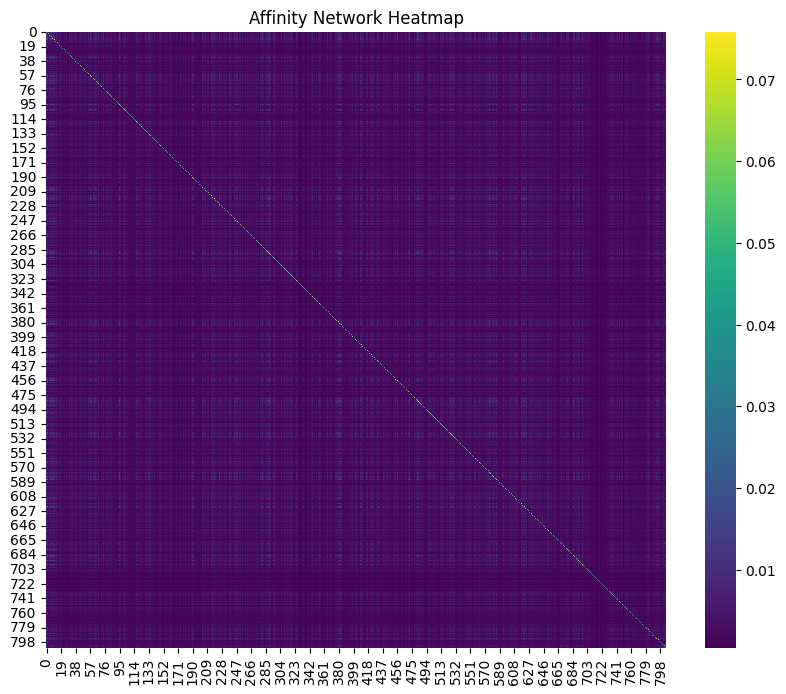

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(affinity_network, cmap='viridis')
plt.title('Affinity Network Heatmap')
plt.show()